#Data Preprocessing

In [ ]:
#Mount on Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#unzip dataset
%cd /content/gdrive/My Drive/IPPR 2020 !unzip faces94.zip %cd faces94

In [ ]:
#import required packages
from mlxtend.data import loadlocal_mnist
import numpy as np
from sklearn import neighbors, metrics
from sklearn import svm # This package is used for svm classification
import matplotlib.pyplot as plt
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)
from skimage import feature # This pacakge is used for LBP feature extraction
import matplotlib.pyplot as plt #This package is used for data visualization
%matplotlib inline

import shutil, os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
female = '/content/gdrive/My Drive/IPPR 2020/faces94/female'
male = '/content/gdrive/My Drive/IPPR 2020/faces94/male'
malestaff = '/content/gdrive/My Drive/IPPR 2020/faces94/malestaff'
dst = '/content/gdrive/My Drive/IPPR 2020/faces94_concate'

In [ ]:
file_names = os.listdir(female)
    
for file_name in file_names:
    shutil.move(os.path.join(female, file_name), dst)

In [ ]:
file_names = os.listdir(male)
    
for file_name in file_names:
    shutil.move(os.path.join(male, file_name), dst)

In [ ]:
file_names = os.listdir(malestaff)
    
for file_name in file_names:
    shutil.move(os.path.join(malestaff, file_name), dst)

In [ ]:
#print number of images in rain folder
all_class = os.listdir(dst)
len(all_class)

In [ ]:
pip install split-folders tqdm

In [ ]:
#Install required package of split-folders
pip install split-folders

In [ ]:
import splitfolders
# Split with a ratio
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio('/content/gdrive/My Drive/IPPR 2020/faces94_concate', output="/content/gdrive/My Drive/IPPR 2020/split_dataset", seed=1337, ratio=(.8, .2)) # default values

#Understand the data

In [ ]:
#get path to root dir
base_dir_path = '/content/gdrive/My Drive/IPPR 2020/split_dataset'
train_dir_path = os.path.join(base_dir_path, 'train')
test_dir_path = os.path.join(base_dir_path, 'val')

In [ ]:
#get names of all classes
def getAllClassNames(dir_path):
    return os.listdir(dir_path)

In [ ]:
def understandData(BASE_DIR_PATH):    
    train_dir_path = os.path.join(BASE_DIR_PATH,'train')
    test_dir_path = os.path.join(BASE_DIR_PATH,'val')
    print("Number of Classes = ",len(os.listdir(train_dir_path)))
    AllClassNames = os.listdir(train_dir_path)
    #print("Class Names = ",AllClassNames)
#    print('CLASS NAME'+'\t'+'NUMBER OF IMAGES')    
#    for class_name in AllClassNames:
#        print(class_name+'\t',len(os.listdir(os.path.join(train_dir_path,class_name))))
    displaySampleImages(train_dir_path,AllClassNames)
    return

In [ ]:
#Read all the image file in train/test folders
#print out the numbers 
def readData(BASE_DIR_PATH):
    nb_of_train_files = 0
    nb_of_test_files = 0
    nb_of_val_files = 0
    train_dir_path = os.path.join(BASE_DIR_PATH,'train')
    test_dir_path = os.path.join(BASE_DIR_PATH,'val')
    AllClassNames_train = os.listdir(train_dir_path)
    AllClassNames_test = os.listdir(test_dir_path)
    print('Number of Classes in train DataSet: ',len(AllClassNames_train))
    print('Number of Classes in test DataSet: ',len(AllClassNames_test))        
    for class_name in AllClassNames:
        nb_of_train_files = nb_of_train_files + len(os.listdir(os.path.join(train_dir_path,class_name)))
        nb_of_test_files = nb_of_test_files + len(os.listdir(os.path.join(test_dir_path,class_name)))
    print('Number of train samples: ',nb_of_train_files)
    print('Number of test samples:',nb_of_test_files)   
    return

In [ ]:
#call of all the functions
AllClassNames = getAllClassNames(train_dir_path)
num_of_classes = len(AllClassNames)
DictOfClasses = {i : AllClassNames[i] for i in range(0, len(AllClassNames))}

In [ ]:
#call of the 'readData' function
readData(base_dir_path)

Number of Classes in train DataSet:  154
Number of Classes in test DataSet:  154
Number of train samples:  2462
Number of test samples: 617


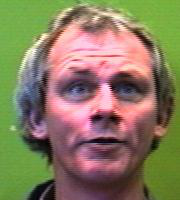

In [ ]:
#Demostration of some examples in the dataset
image_example = Image.open("/content/gdrive/My Drive/IPPR 2020/split_dataset/train/tony/tony.1.jpg")
image_example

#Transfering images to arrays

In [ ]:
#import skimage packages to read all the image files
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

In [ ]:
#import numpy to store the image files
import numpy as np
import matplotlib.pyplot as mpplot
import matplotlib.image as mpimg

train_images = []
train_path = "/content/gdrive/My Drive/IPPR 2020/split_dataset/train"

#read all the files in the folder ending with '.jpg'
for root, _, files in os.walk(train_path):
  current_directory_path = os.path.abspath(root)
  for f in files: 
    name, ext = os.path.splitext(f)
    if ext == ".jpg":
      current_image_path = os.path.join(current_directory_path, f)
      current_image = mpimg.imread(current_image_path)
      train_images.append(current_image)

In [ ]:
#print out the shape of the train_image array
train_images = np.array(train_images)
train_images.shape

(2447, 200, 180, 3)

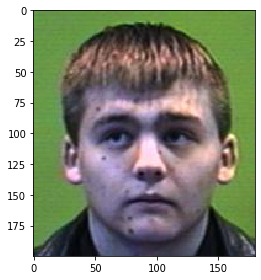

In [ ]:
#demonstration of the first image in the array
imshow(train_images[0])

In [ ]:
#transfer all the image files in to array
#store in an arraylist
train_data = []

#resize the images in the array to 224*224
for ind in range(len(train_images)):
  image_ind = (train_images[ind])
  resized_image = resize(image_ind, (224,224))
  train_data.append(resized_image)

#print out the shape of the arraylist
train_data = np.array(train_data)
train_data.shape

(2447, 224, 224, 3)

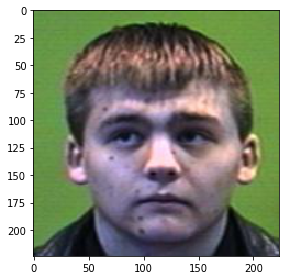

In [ ]:
#demonstration of the first image after resizing
imshow(train_data[0]) 

In [ ]:
#store all the labels that correspond to each image into an arraylist
train_labels_list = []

for root, _, files in os.walk(train_path):
  current_directory_path = os.path.relpath(root)
  for f in files: 
    name, ext = os.path.splitext(f)
    if ext == ".jpg":
      current_image_path = current_directory_path
      train_labels_list.append(current_image_path)

#print out the number of items in the list
len(train_labels_list)

2447

In [ ]:
#extract the labels from the full path names
train_labels = []
for item in train_labels_list:
  label = item.replace('gdrive/My Drive/IPPR 2020/split_dataset/train/', '')
  train_labels.append(label)

In [ ]:
len(train_labels)

2447

In [ ]:
#storing all test images into an arraylist
test_images = []
test_path = "/content/gdrive/My Drive/IPPR 2020/split_dataset/val"

for root, _, files in os.walk(test_path):
  current_directory_path = os.path.abspath(root)
  for f in files: 
    name, ext = os.path.splitext(f)
    if ext == ".jpg":
      current_image_path = os.path.join(current_directory_path, f)
      current_image = mpimg.imread(current_image_path)
      test_images.append(current_image)

In [ ]:
#resize test images into 224*224 pixels
test_data = []

for ind_t in range(len(test_images)):
  image_ind_t = (test_images[ind_t])
  resized_image_t = resize(image_ind_t, (224,224))
  test_data.append(resized_image_t)

test_data = np.array(test_data)
test_data.shape

(612, 224, 224, 3)

In [ ]:
#storing test labels into an arraylist
test_labels_list = []

for root, _, files in os.walk(test_path):
  current_directory_path = os.path.relpath(root)
  for f in files: 
    name, ext = os.path.splitext(f)
    if ext == ".jpg":
      current_image_path = current_directory_path
      test_labels_list.append(current_image_path)

len(test_labels_list)

612

In [ ]:
#extract test labels from the full path names
test_labels = []
for item in test_labels_list:
  label = item.replace('gdrive/My Drive/IPPR 2020/split_dataset/val/', '')
  test_labels.append(label)

#HOG Feature Extraction

In [ ]:
train_h = []
label = []
# loop over the training images
for img_index in range(len(train_data)):
  # load the image, and extract HOG features
  image_h = (train_data[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hog = feature.hog(image_h, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
 
  # update the data and labels
  train_h.append(hog)
  label.append(train_labels[img_index])

##KNN Classifier

###Train the classifier on HOG feature extraction

In [ ]:
#build knn classifier with n=2
knn = neighbors.KNeighborsClassifier(n_neighbors=2).fit(train_h,label)
# Check the training accuracy
print("Train set Accuracy: {:.3f}".format(knn.score(train_h,label)))

Train set Accuracy: 0.993


###Test the classifier on HOG feature extraction

In [ ]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(test_data)):
  # load the image, and extract HOG features
  img=test_data[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(8,8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = knn.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)
  
  labels_test.append(test_labels[img_ind])

Extracting features from test dataset...


In [ ]:
# Test set Accuracy
accuracy = metrics.accuracy_score(labels_test, predict_test)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.9901960784313726


##SVM Classifier

###Train the classifier on HOG feature extraction

In [ ]:
# train a SVM clasifier with HOG feature extraction
# Initialize the SVM model with the best performing parameter set
#Hyperparameter tuning - from 'c' = 100.0 to 'c' = 1.0
SVM_h = svm.SVC(C=1.0, kernel='rbf', gamma = 'auto', random_state=42)
# Start training the SVM classifier 
SVM_h.fit(train_h, label)
print("Train set Accuracy: {:.2f}".format(SVM_h.score(train_h,label)))

Train set Accuracy: 0.98


###Test the classifier on the HOG feature extraction

In [ ]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(test_data)):
  # load the image, and extract HOG features
  img=test_data[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(8,8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = SVM_h.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)
  
  labels_test.append(test_labels[img_ind])

Extracting features from test dataset...


In [ ]:
# Test set Accuracy
accuracy = metrics.accuracy_score(labels_test, predict_test)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.9852941176470589


#LBP Feature Extraction

###Applying Median Filter on the training dataset

In [ ]:
#using OpenCv to apply mediam filter on the train images
import cv2 as cv
median_filtered = []
# 5*5 averaging filter kernel is defined
kernel = np.ones((5,5),np.float32)/25
for image in range(len(train_data)):
  im = (train_data[image])
  median = cv.filter2D(im, -1, kernel)
  median_filtered.append(median)

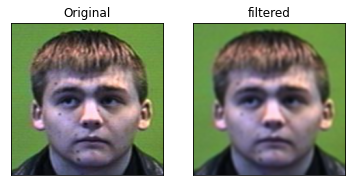

In [ ]:
#demonstration of comparison
#the original training image example vs the filtered training image
plt.subplot(121),plt.imshow(train_data[0]),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median_filtered[0]),plt.title('filtered')
plt.xticks([]), plt.yticks([])
plt.show()

###Covert from RGB to Grayscale

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
    
grayscale_train = []
for img_index in range(len(median_filtered)):
	# load the train image, and extract LBP features
    image = (median_filtered[img_index])
    gray = rgb2gray(image)
    grayscale_train.append(gray)

###Define LBP feature extraction function

In [ ]:
class LBP:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def getLBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
	  
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		# return the histogram of Local Binary Patterns
		return hist

In [ ]:
# different combination of paramters of P and R
desc = LBP(24,3)

#create lists for extracted features
train_m = []
labels_m = []

# loop over the training images
for img_index in range(len(grayscale_train)):
	# load the train image, and extract LBP features
    image = (grayscale_train[img_index])
    hist = desc.getLBPfeatures(image)
    train_m.append(hist)

    # extract the label from the image path, then update the
	  # label and data lists
    labels_m.append(train_labels[img_index])

	# extract the label from the image path, then update the label and data lists

###Apply Median Filter and grayscale conversion on the test set

In [ ]:
#using OpenCv to apply mediam filter on the train images
import cv2 as cv
median_filtered_t = []
# 5*5 averaging filter kernel is defined
kernel = np.ones((5,5),np.float32)/25
for image in range(len(test_data)):
  im = (test_data[image])
  median = cv.filter2D(im, -1, kernel)
  median_filtered_t.append(median)

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
    
grayscale_test = []
for img_index in range(len(median_filtered_t)):
	# load the train image, and extract LBP features
    image = (median_filtered_t[img_index])
    gray = rgb2gray(image)
    grayscale_test.append(gray)

###Training KNN classifier on LBP feature extraction

In [ ]:
#build knn classifier with n=3
knn_l = neighbors.KNeighborsClassifier(n_neighbors=2).fit(train_m,labels_m)
# Check the training accuray
print("Train set Accuracy: {:.3f}".format(knn_l.score(train_m,labels_m)))

Train set Accuracy: 0.932


###Testing KNN classifier on LBP feature extraction

In [ ]:
pred_data_l =[]

for im_idx in range(len(grayscale_test)):
  image_test = grayscale_test[im_idx]
  
  # Extract LBP feature
  hist_test = desc.getLBPfeatures(image_test)
  # Perform classification prediction
  prediction = knn_l.predict(hist_test.reshape(1,-1))
  
  # Store the classfication result
  pred_data_l.append(prediction)

accuracy = metrics.accuracy_score(test_labels, pred_data_l)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.8545751633986928


###Training SVM classifier on LBP feature extraction

In [ ]:
# train a SVM clasifier on the training data
# Initialize the SVM model
SVM_l = svm.SVC(kernel='rbf',C=100.0, random_state=42) # rbf Kernel
# Start training the SVM classifier 
SVM_l.fit(train_m,labels_m)
print("Train set Accuracy: {:.2f}".format(SVM_l.score(train_m,labels_m)))

Train set Accuracy: 0.94


###Testing SVM classifier on LBP feature extraction

In [ ]:
pred_data_l =[]

for im_idx in range(len(grayscale_test)):
  image_test = grayscale_test[im_idx]
  
  # Extract LBP feature
  hist_test = desc.getLBPfeatures(image_test)
  # Perform classification prediction
  prediction = SVM_l.predict(hist_test.reshape(1,-1))
  
  # Store the classfication result
  pred_data_l.append(prediction)

accuracy = metrics.accuracy_score(test_labels, pred_data_l)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.9133986928104575


#Evaluation

The evaluation will be based on KNN classifier with HOG feature extraction since it is the best performing technique.

In [ ]:
#errpr rate of the predicted results
error_rate = 1 - accuracy
error_rate

0.009803921568627416

In [ ]:
#print out the wrong predictions
for prediction, label in zip(predict_test, labels_test):
  if prediction != label:
    print(label, 'has been classified as', prediction, ', and should be', label) 

tony has been classified as doraj , and should be tony
gotone has been classified as kaknig , and should be gotone
gotone has been classified as ksunth , and should be gotone
gotone has been classified as klclar , and should be gotone
phughe has been classified as gotone , and should be phughe
sbains has been classified as gotone , and should be sbains


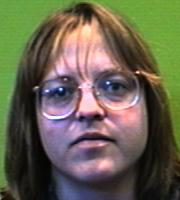

In [ ]:
#demonstration on the ground truth image
gotone = Image.open("/content/gdrive/My Drive/IPPR 2020/split_dataset/val/gotone/kaknig.jpg")
gotone

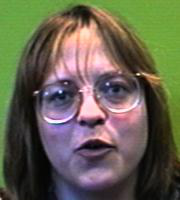

In [ ]:
#demonstration on wrong predicted images
kaknig = Image.open("/content/gdrive/My Drive/IPPR 2020/split_dataset/val/kaknig/kaknig.14.jpg")
kaknig